# Nice Trees

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn.apionly as sns

//anaconda/envs/py3l/lib/python3.6/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
//anaconda/envs/py3l/lib/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


Viz codes from https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176 and Jake Vanderplas's tutorials

## Playing with Regression

In [33]:
from sklearn.tree import DecisionTreeRegressor
x = np.arange(0, 2*np.pi, 0.1)
y = np.sin(x) + 0.1*np.random.normal(size=x.shape[0])

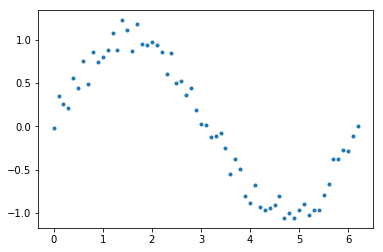

In [34]:
plt.plot(x,y, '.');


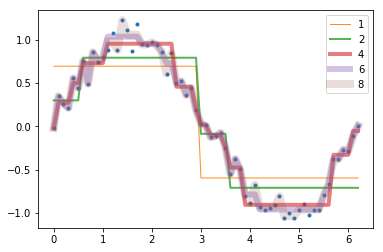

In [35]:
plt.plot(x,y,'.')
xx = x.reshape(-1,1)
for i in [1,2,4,6,8]:
    dtsin = DecisionTreeRegressor(max_depth=i)
    dtsin.fit(xx, y)
    plt.plot(x, dtsin.predict(xx), label=str(i), alpha=1-i/10, lw=i)
plt.legend();

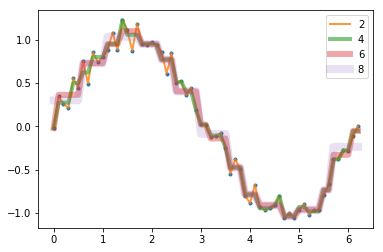

In [36]:
plt.plot(x,y,'.')
xx = x.reshape(-1,1)
for i in [2,4,6,8]:
    dtsin = DecisionTreeRegressor(min_samples_split=i)
    dtsin.fit(xx, y)
    plt.plot(x, dtsin.predict(xx), label=str(i), alpha=1-i/10, lw=i)
plt.legend();

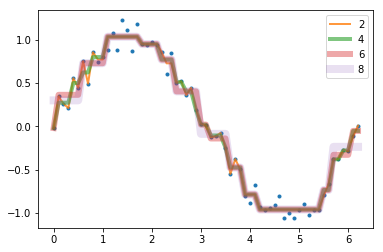

In [37]:
plt.plot(x,y,'.')
xx = x.reshape(-1,1)
for i in [2,4,6,8]:
    dtsin = DecisionTreeRegressor(max_depth=6, min_samples_split=i)
    dtsin.fit(xx, y)
    plt.plot(x, dtsin.predict(xx), label=str(i), alpha=1-i/10, lw=i)
plt.legend();

## Classification

In [2]:
df = pd.read_csv("data/lendingtree.csv")
df

,Income,Credit,Repay
0,85,620,1
1,108,648,1
2,60,682,1
3,110,701,1
4,69,731,1
5,81,716,1
6,93,749,1
7,61,752,1
8,65,767,1
9,52,788,1


In [3]:
y = df.Repay.values
X = df[['Income', 'Credit']].values

## Decision Tree experiment for classification

In [4]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X, y)
dtree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [5]:
from sklearn.tree import export_graphviz
from IPython.display import Image

In [6]:
import pydotplus

In [7]:
import io
dot_string = io.StringIO()

In [8]:
export_graphviz(dtree, out_file=dot_string,  
                filled=True, rounded=True, impurity = False,
                special_characters=True,
                node_ids=True,
                feature_names = ['Income', 'Credit'])

In [9]:
def display_graph(dt):
    dot_string = io.StringIO()
    export_graphviz(dt, out_file=dot_string,  
                filled=True, rounded=True, impurity = False,
                special_characters=True,
                node_ids=True,
                feature_names = ['Income', 'Credit'])
    graph = pydotplus.graph_from_dot_data(dot_string.getvalue())
    return Image(graph.create_png())

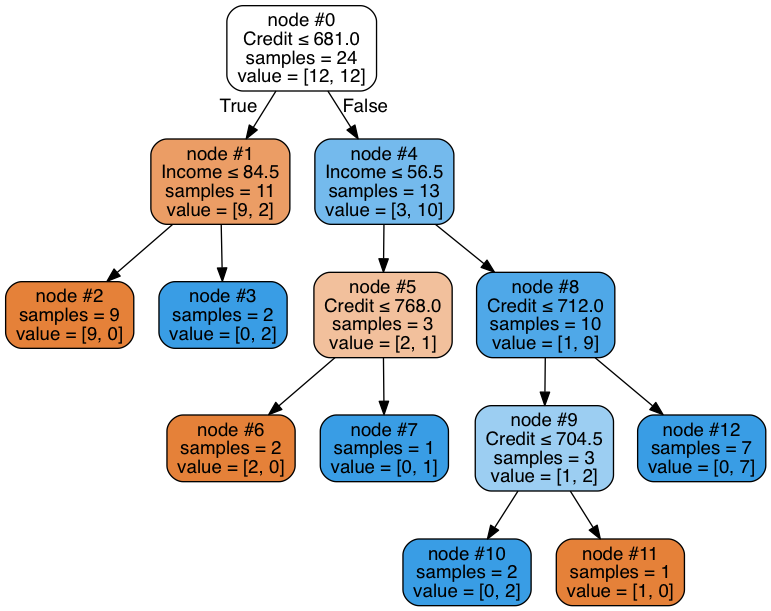

In [10]:
graph = pydotplus.graph_from_dot_data(dot_string.getvalue())  
Image(graph.create_png())

In [11]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #
# Plot tree containing only two covariates
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #

from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

def plot_2tree(X, y, clf, lab = ['Feature 1', 'Feature 2'], alpha=0.4):
    # Create a meshgrid as our test data
    ax= plt.figure()
    plot_step_x= 0.1
    plot_step_y= 1
    xmin, xmax= X[:,0].min(), X[:,0].max()
    ymin, ymax= X[:,1].min(), X[:,1].max()
    xx, yy = np.meshgrid(np.arange(xmin, xmax, plot_step_x), np.arange(ymin, ymax, plot_step_y) )

    # Re-cast every coordinate in the meshgrid as a 2D point
    Xplot= np.c_[xx.ravel(), yy.ravel()]


    # Predict the class
    Z = clf.predict( Xplot )

    # Re-shape the results
    Z= Z.reshape( xx.shape )
    cs = plt.contourf(xx, yy, Z, cmap= cmap_light, alpha=0.3)
  
    # Overlay training samples
    plt.scatter(X[:, 0], X[:, 1], c=y-1, cmap=cmap_bold, alpha=alpha,edgecolor="k") 
    
    plt.xlabel(lab[0])
    plt.ylabel(lab[1])
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    return ax, xmin, xmax, ymin, ymax

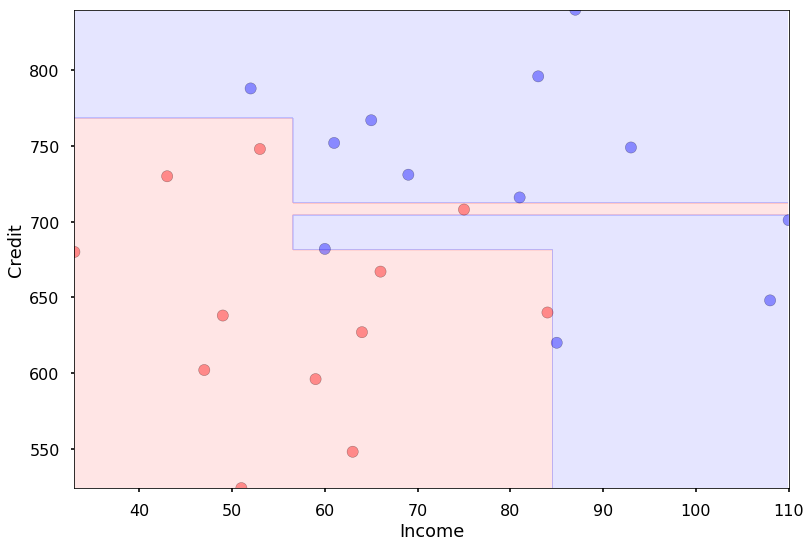

In [12]:
with sns.plotting_context('poster'):
    axs=plot_2tree(X, y, dtree, lab = ['Income', 'Credit'])

In [13]:
paths = dtree.decision_path(X)
paths

<24x13 sparse matrix of type '<class 'numpy.int64'>'
	with 88 stored elements in Compressed Sparse Row format>

In [16]:
paths.todense()

matrix([[1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0],
        [1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0],
        [1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
        [1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
        [1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
        [1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
        [1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
        [1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
        [1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
        [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 0,

In [17]:
def est_structure(estimator):
    n_nodes = estimator.tree_.node_count
    children_left = estimator.tree_.children_left
    children_right = estimator.tree_.children_right
    feature = estimator.tree_.feature
    threshold = estimator.tree_.threshold


    # The tree structure can be traversed to compute various properties such
    # as the depth of each node and whether or not it is a leaf.
    node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
    is_leaves = np.zeros(shape=n_nodes, dtype=bool)
    is_left = np.zeros(shape=n_nodes, dtype=bool)
    is_right = np.zeros(shape=n_nodes, dtype=bool)
    parent = np.zeros(shape=n_nodes, dtype=np.int64)
    stack = [(0, -1)]  # seed is the root node id and its parent depth
    while len(stack) > 0:
        node_id, parent_depth = stack.pop()
        node_depth[node_id] = parent_depth + 1

        # If we have a test node
        if (children_left[node_id] != children_right[node_id]):
            stack.append((children_left[node_id], parent_depth + 1))
            stack.append((children_right[node_id], parent_depth + 1))
            is_left[children_left[node_id]] = True
            parent[children_left[node_id]] = node_id
            is_right[children_right[node_id]] = True
            parent[children_right[node_id]] = node_id
        else:
            is_leaves[node_id] = True

    print("The binary tree structure has %s nodes and has "
          "the following tree structure:"
          % n_nodes)
    for i in range(n_nodes):
        if is_leaves[i]:
            print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
        else:
            print("%snode=%s test node: go to node %s if X[:, %s] <= %s else to "
                  "node %s."
                  % (node_depth[i] * "\t",
                     i,
                     children_left[i],
                     feature[i],
                     threshold[i],
                     children_right[i],
                     ))
    return n_nodes, node_depth, feature, threshold, is_leaves, is_left, is_right, parent

## Decision Tree levels

In [18]:
nn, nd, f, t, il, ile, iri, p = est_structure(dtree)

The binary tree structure has 13 nodes and has the following tree structure:
node=0 test node: go to node 1 if X[:, 1] <= 681.0 else to node 4.
	node=1 test node: go to node 2 if X[:, 0] <= 84.5 else to node 3.
		node=2 leaf node.
		node=3 leaf node.
	node=4 test node: go to node 5 if X[:, 0] <= 56.5 else to node 8.
		node=5 test node: go to node 6 if X[:, 1] <= 768.0 else to node 7.
			node=6 leaf node.
			node=7 leaf node.
		node=8 test node: go to node 9 if X[:, 1] <= 712.0 else to node 12.
			node=9 test node: go to node 10 if X[:, 1] <= 704.5 else to node 11.
				node=10 leaf node.
				node=11 leaf node.
			node=12 leaf node.


top 1
top 1
not top 0
feat0 1 True False 0
1 84.5 0 681.0 316 2.1550632911392404
top 1
not top 0
feat0 1 True False 0
1 84.5 0 681.0 316 2.1550632911392404
not top -2
not top -2
not top 0
feat0 4 False True 0
4 56.5 0 681.0 316 2.1550632911392404
top 1
not top 0
feat0 1 True False 0
1 84.5 0 681.0 316 2.1550632911392404
not top -2
not top -2
not top 0
feat0 4 False True 0
4 56.5 0 681.0 316 2.1550632911392404
not top 1
feat1 5 True False 4
1 0
5 768.0 4 56.5 77 0.7337662337662337
<< 4 4 0.3051948051948052
top 1
not top 0
feat0 1 True False 0
1 84.5 0 681.0 316 2.1550632911392404
not top -2
not top -2
not top 0
feat0 4 False True 0
4 56.5 0 681.0 316 2.1550632911392404
not top 1
feat1 5 True False 4
1 0
5 768.0 4 56.5 77 0.7337662337662337
<< 4 4 0.3051948051948052
not top -2
not top -2
not top 1
feat1 8 False True 4
1 0
8 712.0 4 56.5 77 0.7337662337662337
>> 4 4 0.3051948051948052
top 1
not top 0
feat0 1 True False 0
1 84.5 0 681.0 316 2.1550632911392404
not top -2
not top -2
not top 

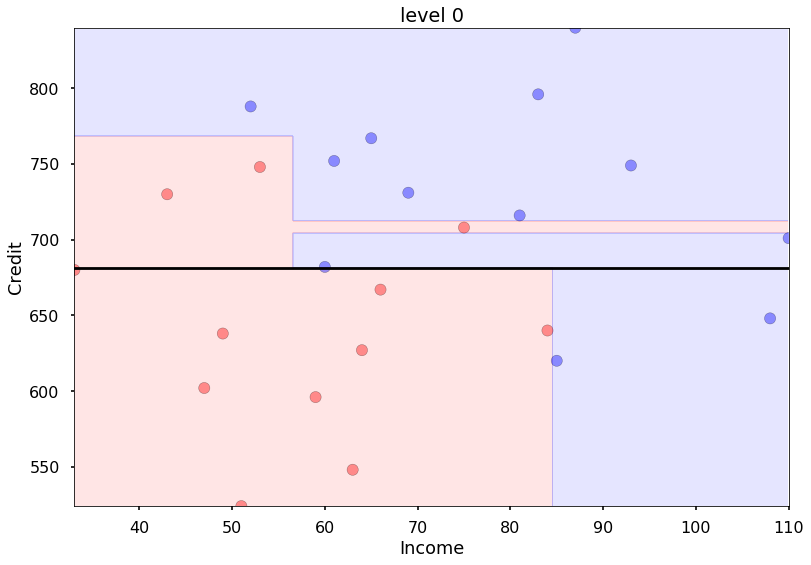

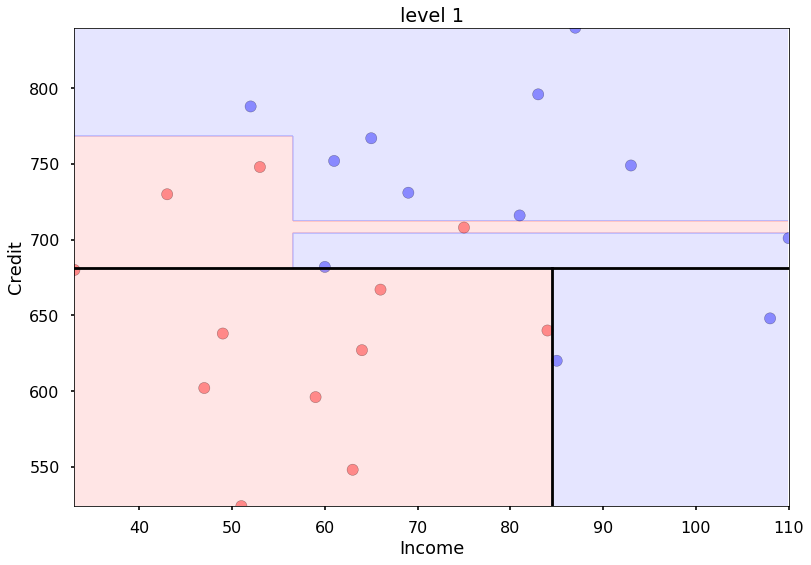

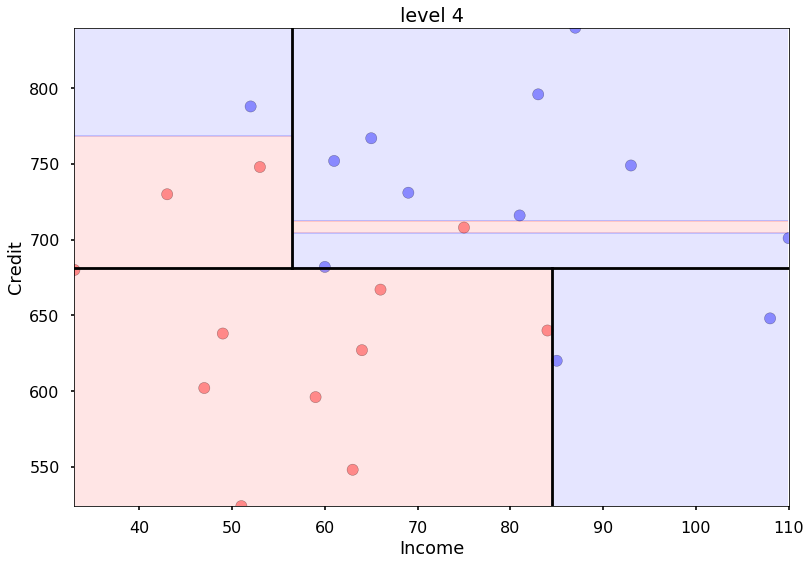

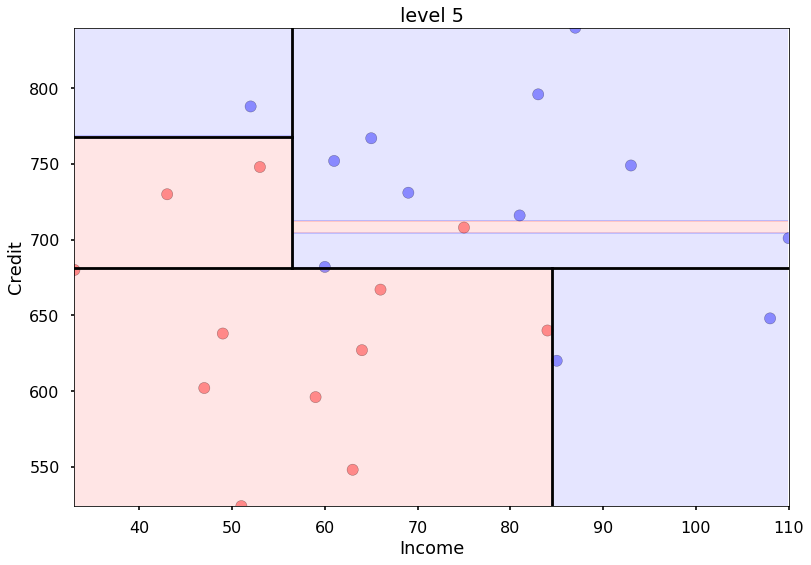

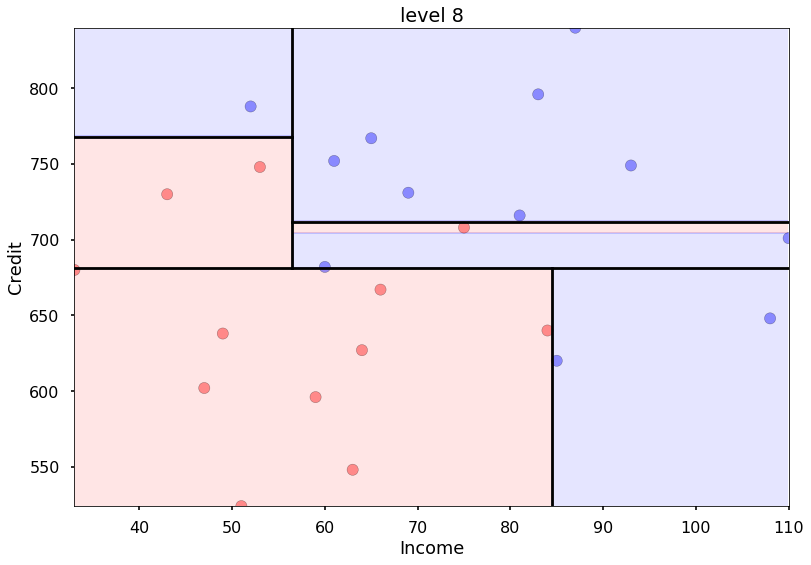

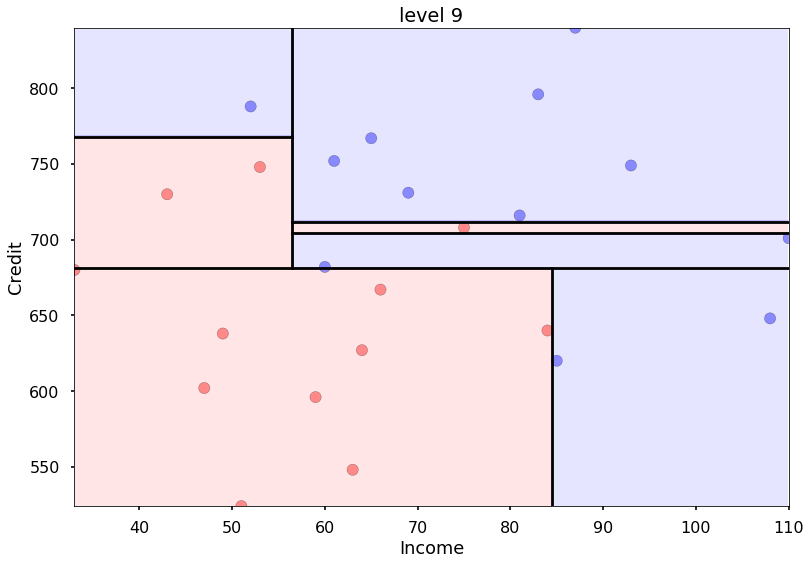

In [23]:
with sns.plotting_context('poster'):
    for i in range(nn):
        if not il[i]:
            fig, xmin, xmax, ymin, ymax = plot_2tree(X, y, dtree, lab = ['Income', 'Credit'])
            xra = xmax-xmin
            yra = ymax-ymin
            plt.title("level {}".format(i))
            for j in range(i+1):
                if j==0 and p[j]==0:
                    print("top", f[j])
                    if f[j]==0:
                        plt.axvline(t[j], 0, 1, c='k')
                    elif f[j]==1:
                        plt.axhline(t[j],0, 1, c='k')
                else:
                    print("not top", f[j])
                    if f[j]==0:
                        print("feat0", j, ile[j], iri[j], p[j])
                        print(j, t[j], p[j], t[p[j]], yra, t[p[j]]/yra)
                        if f[p[j]] == f[j]:
                            pee = p[j]
                            left = ile[j]
                            right = iri[j]
                            while(f[pee] == f[j]):
                                left = ile[pee]
                                right = iri[pee]
                                pee = p[pee]
                        else:
                            pee = p[j]
                            left = ile[j]
                            right = iri[j]
                        if left:
                            plt.axvline(t[j], 0, (t[pee] - ymin)/yra, c='k')
                        elif right:
                            plt.axvline(t[j], (t[pee]-ymin)/yra, 1, c='k')
                    elif f[j]==1:
                        print("feat1", j, ile[j], iri[j], p[j])
                        print(f[j], f[p[j]])
                        print(j, t[j], p[j], t[p[j]], xra, t[p[j]]/xra)
                        if f[p[j]] == f[j]:
                            pee = p[j]
                            left = ile[j]
                            right = iri[j]
                            while(f[pee] == f[j]):
                                left = ile[pee]
                                right = iri[pee]
                                pee = p[pee]
                        else:
                            pee = p[j]
                            left = ile[j]
                            right = iri[j]
                        if left:
                            print("<<", pee, p[j], (t[pee] - xmin)/xra)
                            plt.axhline(t[j], 0, (t[pee]-xmin)/xra, c='k')
                        elif right:
                            print(">>", pee, p[j],(t[pee] - xmin)/xra)
                            plt.axhline(t[j], (t[pee]-xmin)/xra, 1, c='k')
            plt.savefig("figs/dtspl{0:02}.png".format(i))

## VALIDATION

In [24]:
valstring="""
Income Credit Repay
60 680 0
67 710 1
55 770 1
61 702 0
85 720 1
86 670 1
58 715 0
70 675 0
75 670 0
"""

In [25]:
valio = io.StringIO(valstring)
dfval = pd.read_csv(valio, sep=" ")

In [26]:
dfval

,Income,Credit,Repay
0,60,680,0
1,67,710,1
2,55,770,1
3,61,702,0
4,85,720,1
5,86,670,1
6,58,715,0
7,70,675,0
8,75,670,0


In [27]:
Xval = dfval[['Income', 'Credit']].values
yval = dfval.Repay.values

In [28]:
yval

array([0, 1, 1, 0, 1, 1, 0, 0, 0])

In [29]:
dtree.predict(Xval)

array([0, 0, 1, 1, 1, 1, 1, 0, 0])

### Validation Accuracies

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(dtree.predict(Xval), yval)

0.6666666666666666

### Where are the validation Points

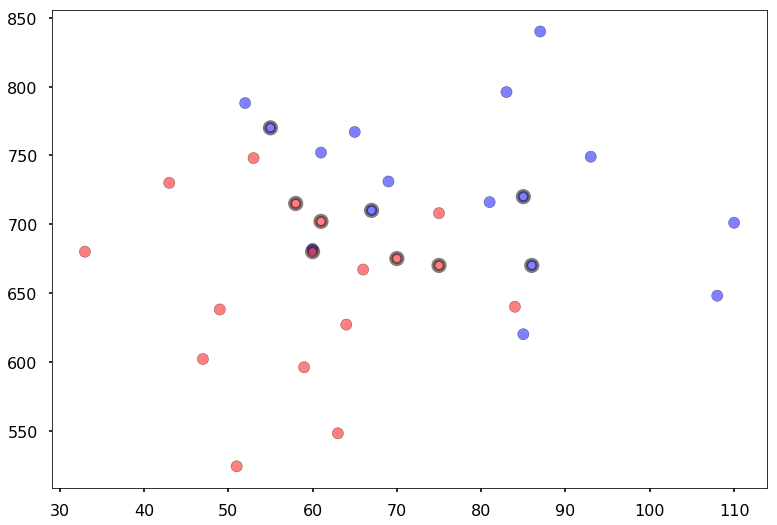

In [32]:
with sns.plotting_context('poster'):
    plt.scatter(X[:, 0], X[:, 1], c=y-1, cmap=cmap_bold, alpha=0.5, edgecolor="k")
    plt.scatter(Xval[:, 0], Xval[:, 1], c=yval-1, cmap=cmap_bold, alpha=0.5, edgecolor="k", lw=4)